In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [5]:
inputs = r"C:\Users\DAI.STUDENTSDC\Desktop\NLP_CV\dataset\CV\images"
outputs = r"C:\Users\DAI.STUDENTSDC\Desktop\NLP_CV\CV\outputs"
img = cv2.imread(os.path.join(inputs, 'sachin.jpg'), 0 )

In [19]:
lenna = cv2.imread(os.path.join(inputs, 'lenna.png'), 0 )

### using sobel detection algo

In [25]:
help(cv2.Sobel)

Help on built-in function Sobel:

Sobel(...)
    Sobel(src, ddepth, dx, dy[, dst[, ksize[, scale[, delta[, borderType]]]]]) -> dst
    .   @brief Calculates the first, second, third, or mixed image derivatives using an extended Sobel operator.
    .
    .   In all cases except one, the \f$\texttt{ksize} \times \texttt{ksize}\f$ separable kernel is used to
    .   calculate the derivative. When \f$\texttt{ksize = 1}\f$, the \f$3 \times 1\f$ or \f$1 \times 3\f$
    .   kernel is used (that is, no Gaussian smoothing is done). `ksize = 1` can only be used for the first
    .   or the second x- or y- derivatives.
    .
    .   There is also the special value `ksize = #FILTER_SCHARR (-1)` that corresponds to the \f$3\times3\f$ Scharr
    .   filter that may give more accurate results than the \f$3\times3\f$ Sobel. The Scharr aperture is
    .
    .   \f[\vecthreethree{-3}{0}{3}{-10}{0}{10}{-3}{0}{3}\f]
    .
    .   for the x-derivative, or transposed for the y-derivative.
    .
    .   The 

In [59]:
# define teh sobel operators
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize = 3)# Focuses on detecting horizontal edges.
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize = 3)#  Focuses on detecting vertical edges.

In [33]:
final_sobel = cv2.add(sobelx, sobely) #  Acts as a diagonal edge detector since it combines information from both horizontal and vertical gradients.

In [35]:
final_sobel

array([[  0.,   0.,   0., ...,  -2.,   0.,   0.],
       [  0.,   0.,   0., ...,  -8., -12., -12.],
       [  4.,   4.,   4., ...,  -6.,  -2.,   4.],
       ...,
       [ 46.,  54.,  42., ..., -38., -26.,  -8.],
       [  8.,  16.,  10., ..., -16.,  -8.,   0.],
       [  0.,   8.,   2., ...,  -4.,  -2.,   0.]])

In [55]:
thresh, binary_sobel = cv2.threshold(final_sobel, 60, 255, cv2.THRESH_BINARY) # values below 60 will become while and values between 60 and 255 will become black
thresh, binary_sobelx = cv2.threshold(sobelx, 60, 255, cv2.THRESH_BINARY) # values below 60 will become while and values between 60 and 255 will become black
thresh, binary_sobely = cv2.threshold(sobely, 60, 255, cv2.THRESH_BINARY) # values below 60 will become while and values between 60 and 255 will become black

Text(0.5, 1.0, 'edge')

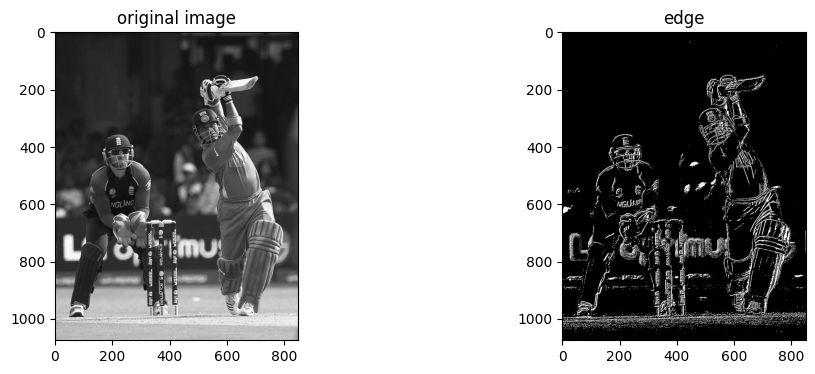

In [61]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.imshow(img, cmap = 'gray')
plt.title('original image')
plt.subplot(1,2,2)
plt.imshow(binary_sobel, cmap = 'gray')
plt.title('edge')

Text(0.5, 1.0, 'edgey')

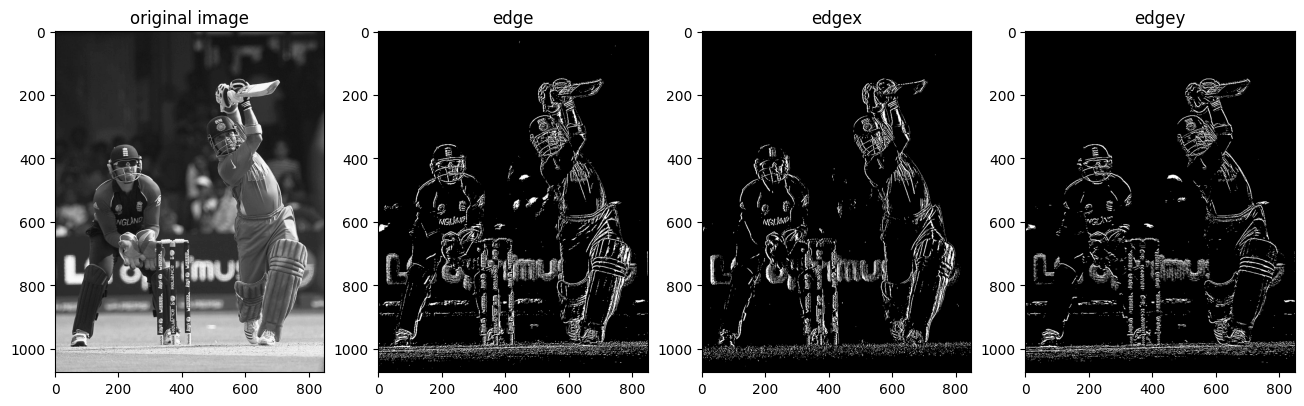

In [57]:
plt.figure(figsize = (16,9))
plt.subplot(1,4,1)
plt.imshow(img, cmap = 'gray')
plt.title('original image')
plt.subplot(1,4,2)
plt.imshow(binary_sobel, cmap = 'gray')
plt.title('edge')
plt.subplot(1,4,3)
plt.imshow(binary_sobelx, cmap = 'gray')
plt.title('edgex')
plt.subplot(1,4,4)
plt.imshow(binary_sobely, cmap = 'gray')
plt.title('edgey')

### Canny Edge Detectionm
- unlike sobel it have no noise
- - best algo to detect images in image detection

In [65]:
help(cv2.Canny)

Help on built-in function Canny:

Canny(...)
    Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]]) -> edges
    .   @brief Finds edges in an image using the Canny algorithm @cite Canny86 .
    .
    .   The function finds edges in the input image and marks them in the output map edges using the
    .   Canny algorithm. The smallest value between threshold1 and threshold2 is used for edge linking. The
    .   largest value is used to find initial segments of strong edges. See
    .   <http://en.wikipedia.org/wiki/Canny_edge_detector>
    .
    .   @param image 8-bit input image.
    .   @param edges output edge map; single channels 8-bit image, which has the same size as image .
    .   @param threshold1 first threshold for the hysteresis procedure.
    .   @param threshold2 second threshold for the hysteresis procedure.
    .   @param apertureSize aperture size for the Sobel operator.
    .   @param L2gradient a flag, indicating whether a more accurate \f$L_2\

In [67]:
edges = cv2.Canny(img, 60, 255)

Text(0.5, 1.0, 'edge')

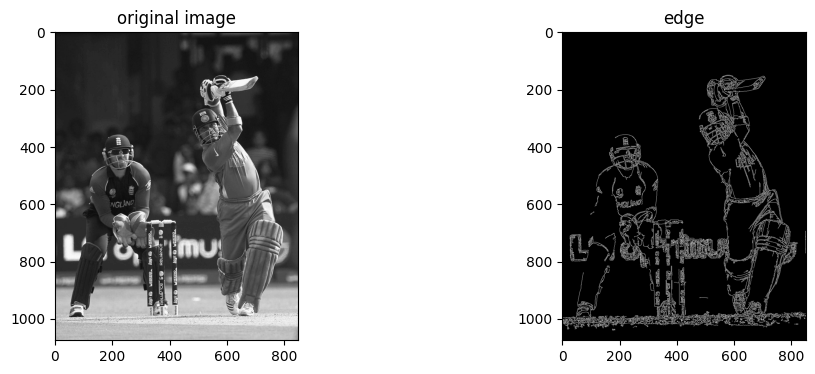

In [75]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.imshow(img, cmap = 'gray')
plt.title('original image')
plt.subplot(1,2,2)
plt.imshow(edges, cmap = 'gray')
plt.title('edge')

Text(0.5, 1.0, 'Canny')

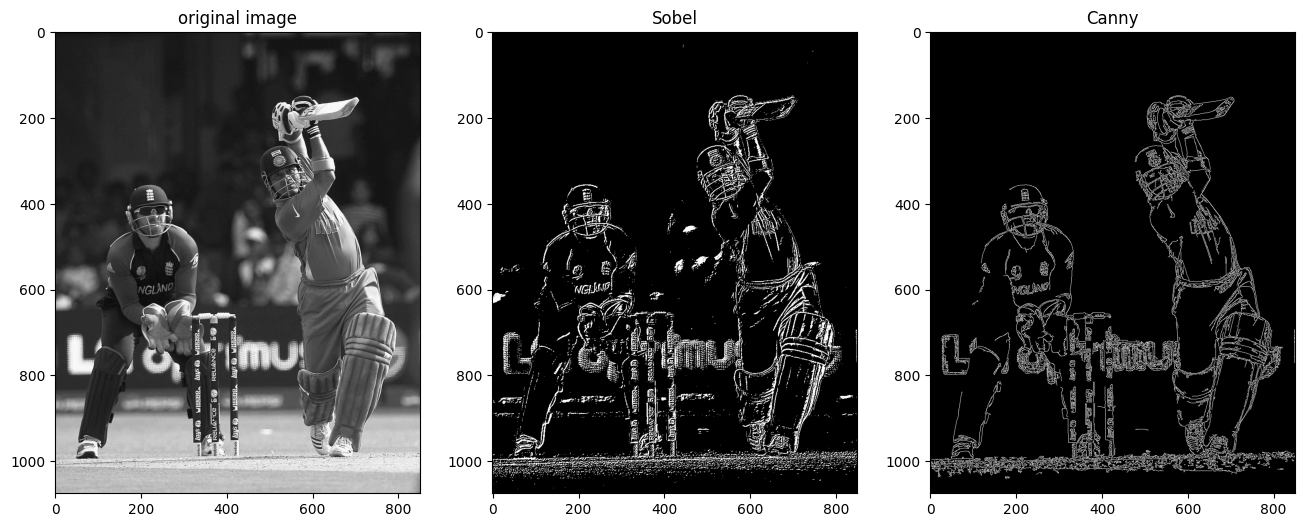

In [81]:
plt.figure(figsize = (16,9))
plt.subplot(1,3,1)
plt.imshow(img, cmap = 'gray')
plt.title('original image')
plt.subplot(1,3,2)
plt.imshow(binary_sobel, cmap = 'gray')
plt.title('Sobel')
plt.subplot(1,3,3)
plt.imshow(edges, cmap = 'gray')
plt.title('Canny')


In [83]:
circle = cv2.imread(os.path.join(inputs, 'circle.png'), 0 )

In [87]:
sobelx = cv2.Sobel(circle, cv2.CV_64F, 1, 0, ksize = 3)
sobely = cv2.Sobel(circle, cv2.CV_64F, 0, 1, ksize = 3)
sobel = sobelx + sobely

In [91]:
thres, sobeli = cv2.threshold(sobel, 60, 255, cv2.THRESH_BINARY)
canny = cv2.Canny(circle, 60, 255)

Text(0.5, 1.0, 'Canny')

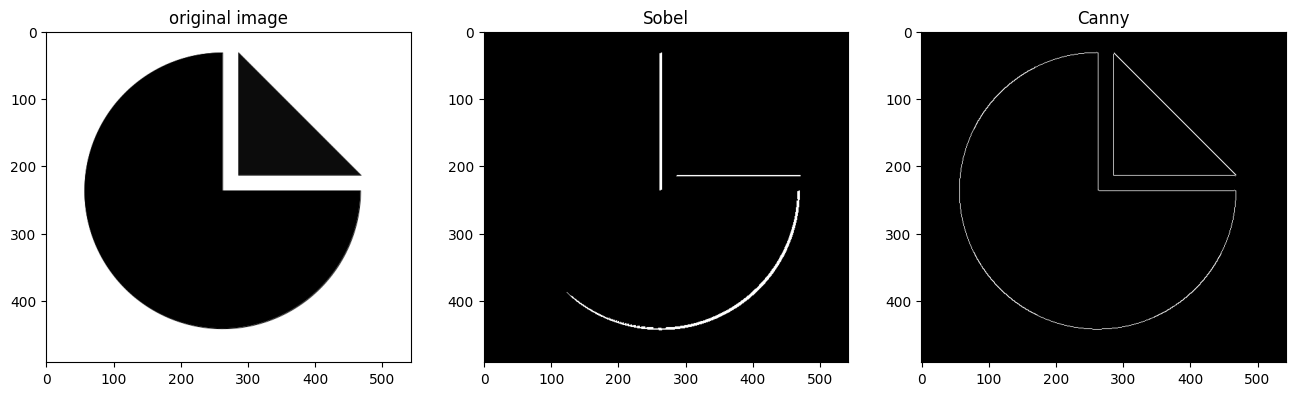

In [93]:
plt.figure(figsize = (16,9))
plt.subplot(1,3,1)
plt.imshow(circle, cmap = 'gray')
plt.title('original image')
plt.subplot(1,3,2)
plt.imshow(sobeli, cmap = 'gray')
plt.title('Sobel')
plt.subplot(1,3,3)
plt.imshow(canny, cmap = 'gray')
plt.title('Canny')